# Примеры работы вашего кода:

## Задания 1 - 4

Приведите ниже по 1-3 примера на каждое из заданий. Структурируйте свой ноутбук с помощью заголовков.

In [100]:
exec(open("GenDec.py").read())

In [78]:
from HW16_GenDec import sliding_window, fibonnaci, deprecated, deprecated_first_use
import matplotlib.pyplot as plt
import functools
import warnings

1. Скользящее окно

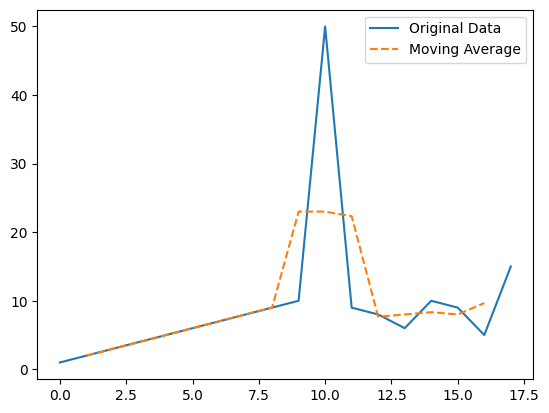

In [70]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 9, 8, 6, 10, 9, 5, 15]
def mean(window):
    return sum(window) / len(window)
# Вычисление скользящего среднего
moving_averages = list(sliding_window(mean, data, 3))
# Визуализация
plt.plot(data, label='Original Data')
plt.plot(range(1, len(data) - 1), moving_averages, label='Moving Average', linestyle='--')
plt.legend()
plt.show()

2. Тотальная Фиббоначизация

In [103]:
# Получение первых N чисел Фибоначчи
N = 100
fib_gen = fibonacci()
fib_numbers = [next(fib_gen) for _ in range(N)]
print(fib_numbers)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

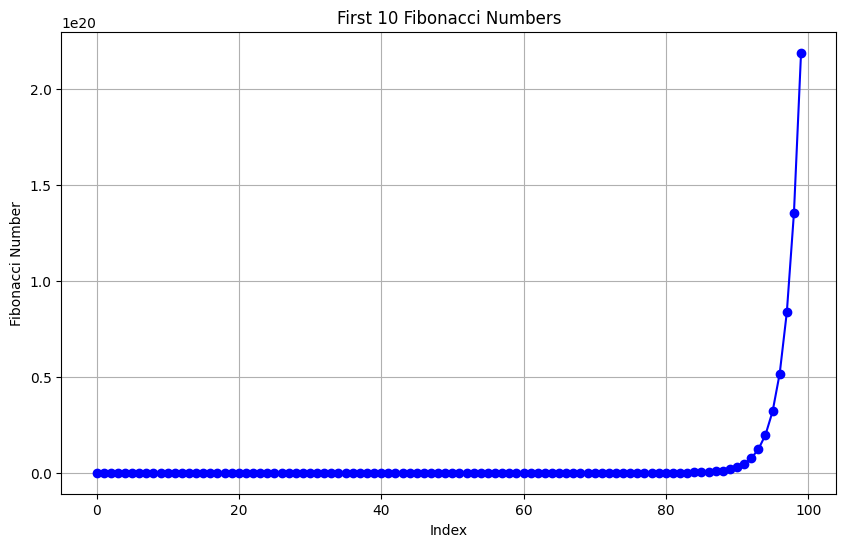

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(fib_numbers, marker='o', linestyle='-', color='b')
plt.title("First 10 Fibonacci Numbers")
plt.xlabel("Index")
plt.ylabel("Fibonacci Number")
plt.grid(True)
plt.show()

3. Депрекация

In [67]:
@deprecated
def my_old_function(x, y):
    return x + y
# Пример вызова задекорированной функции
print(my_old_function(10, 5))

15


<ipython-input-67-daca9088daa5>:5: DeprecationWarning: my_old_function is deprecated
  print(my_old_function(10, 5))


4. Однократная депрекация

In [75]:
@deprecated_first_use
def my_function(x):
    return x * x

# Первый вызов функции - должно появиться предупреждение
print(my_function(2))

4


<ipython-input-75-004eacd60fbf>:6: DeprecationWarning: my_function is deprecated
  print(my_function(2))


In [76]:
# Второй вызов функции - предупреждение выводиться не должно
print(my_function(3))

9


## Задание 5. Кэширование

Тут ничего редактировать не надо, просто запустить эти ячейки:). Однако, можете добавить новые чанки если ваш декаратор может кэшировать функции с произвольным числом произвольных аргументов (чтобы показать это).

In [79]:
from HW16_GenDec import cached

In [88]:
def fib(n):
    if n < 2:
        return 1
    return fib(n-1) + fib(n-2)

@cached
def fib_cached(n):
    if n < 2:
        return 1
    return fib_cached(n-1) + fib_cached(n-2)

In [89]:
%%time

fib(40)

CPU times: user 45.9 s, sys: 67.7 ms, total: 45.9 s
Wall time: 46.3 s


165580141

In [90]:
%%time

cached(40)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 26.7 µs


<function __main__.cached.<locals>.wrapper>

In [101]:
@cached
def sum_and_multiply(*args, multiplier=1):
    return sum(args) * multiplier

# Выполним несколько вызовов функции
sum_and_multiply(1, 2, 3, multiplier=2)
sum_and_multiply(4, 5, multiplier=3)
sum_and_multiply(1, 2, 3, multiplier=2)  # Этот вызов извлечёт результат из кэша
sum_and_multiply(1, 2, 3, multiplier=1)  # Изменён multiplier

# Вывод содержимого кэша
print("Cache contents:")
for key, value in sum_and_multiply.cache.items():
    print(f"{key}: {value}")


Cache contents:
(1, 2, 3, ('multiplier', 2)): 12
(4, 5, ('multiplier', 3)): 27
(1, 2, 3, ('multiplier', 1)): 6
